In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

cd ~/workspace/zaugglab/apobec2_data_analysis/src/analyses_2023_new_sample

/mnt/c/Users/ibarr/Dropbox/workspace/zaugglab/apobec2_data_analysis/src/analyses_2023_new_sample


In [3]:
import numpy as np
import pandas as pd
import os
import mubind as mb

/root/miniconda3/envs/mubind/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
peaks_path = 'DiffBindPeaks.bed'
df = pd.read_csv(peaks_path, header=None, sep='\t')
df = df[df.columns[:3]]
df.columns = ['chr', 'start',  'end']


In [5]:
df['end'] - df['start']

0      401
1      401
2      401
3      401
4      401
      ... 
964    401
965    401
966    401
967    401
968    401
Length: 969, dtype: int64

In [6]:
n_seqs = 10000 # adata.shape[1] # None # 1000
seqs = mb.bindome.tl.get_sequences_from_bed(df[['chr', 'start', 'end']].head(n_seqs), genome='mm10', uppercase=True,
                                            gen_path='../../../../../annotations/mm10/genome/mm10.fa')


/tmp/tmprsmx1tde
genome mm10 True
../../../../../annotations/mm10/genome/mm10.fa
True ../../../../../annotations/mm10/genome/mm10.fa
running bedtools...
bedtools getfasta -fi ../../../../../annotations/mm10/genome/mm10.fa -bed /tmp/tmprsmx1tde -fo /tmp/tmpd2ca1zkl


In [7]:
len(set([s[1] for s in seqs]))

969

In [8]:
import warnings

In [9]:
warnings.filterwarnings('ignore')

In [7]:
kmers_by_module = {}
pwm_by_module = {}
for f in os.listdir('Glossary Modules'):
    name = f.replace('Glossary_module_', '').replace('.xlsx', '')
    xlsx_path = os.path.join('Glossary Modules', f)
    # print(os.path.exists(xlsx_path), xlsx_path)
    kmers = pd.read_excel(os.path.join('Glossary Modules', f), sheet_name='8mers')
    kmers_by_module[name] = kmers[kmers.columns[0]]
    pwm = pd.read_excel(os.path.join('Glossary Modules', f), sheet_name='PWM', index_col=0)
    pwm_by_module[name] = pwm

/root/miniconda3/envs/mubind/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/root/miniconda3/envs/mubind/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/root/miniconda3/envs/mubind/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/root/miniconda3/envs/mubind/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/root/miniconda3/envs/mubind/lib/python3.10/site

ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [12]:
print('loaded pwms', len(pwm_by_module))

loaded pwms 108


In [15]:
for k in pwm_by_module:
    print(k)
    v = pwm_by_module[k].T
    print(v)


AP2
          1    2         3         4         5         6      7    8         9
A  0.160714  0.0  0.000000  0.017857  0.178571  0.464286  0.125  0.0  0.089286
C  0.392857  1.0  0.857143  0.321429  0.053571  0.071429  0.000  0.0  0.464286
G  0.285714  0.0  0.000000  0.125000  0.625000  0.464286  0.875  1.0  0.339286
T  0.160714  0.0  0.142857  0.535714  0.142857  0.000000  0.000  0.0  0.107143


In [16]:
import pickle
pickle.dump(pwm_by_module, open('../../../../../annotations/genre/genre_pwms.pkl', 'wb'))

### Generate pos and neg

In [9]:
from ushuffle import shuffle, Shuffler

fg = seqs
bg = []

for h, s in fg:
    print(s)
    bg.append(shuffle(str.encode(s), 2))



GGCTCTTCAGCTGTCTCTGTTAAGTGAGATCATAGATTAACTCAGAAGCACACGGTCACTGTGAGAAGAGACTGCATGCTCCATCAGTCTCCCAGACTAGCATTCAGCACCAGGAACAGCTGCGGAGCCACACAGGCCACACGAACATAGTTCCGCCTTGAGGACTCAGTCACATACGGGCAAGCAGGGAAACACTGGGGCATGACATCATTTGATAATAAACAGACTAATCCCAGCAGGCATTCCTAACCAAACTCAATGTACCATGCACCCGAGAGGCCATGCTTCTCTGAGACACGGGGATCAAGTCACAAAGCTCATCCGTTGGGAGATGCAGACGCCCAACCCACAAAGCATGCTGCTGATGCTGATGTAGTGACTCACATCGCTGGTGAATTTTG
AATGATAGCAGGATTCTCTGGTCAGGCTCAAGGTTACAGGCAACCACATTACCCAACTATAGAGAAACATAATCATTCCTTTTCCCACAGATAACGAAGGTCTTCCTGTCATCCTACAGGAATCCCATTCCCTTCTCCTAGAGTGTAACCAGACACTTGGCCACAAAGAATAACACTCTTCTGCTTGGCTTGGCCTCAGGGTAATCAGTCAAGGCTAGGCAAGGCCAACAACCCCCAATGCTACAGTAACCACAGAAACCACACAGAACTTGGGTGGAACACGTGGTCTAGACAGTCATCATTTTCAACACAGGGAGATGAAGTCACACAGACTTTTCTCTCCTGAAAATAAAATGTTGAAATACAGCATTAGAAGCAAATGTTCTCCCAGAGGAGAAATG
GGGCGGCGGTCGGGGGCGTAGAGCTGAAACCCTGACAGACACCGCTCGTCCGCCCCGCCCCGCGACGCAACGTACTCACGCTCAGCAGCCAGCCAATCGGAGCCCCGGGATGAGGTTGCGTCGGAAATTGGGTTCTGAGAGAGGCGAGGCCTACGATTGCCCCGCCCCCTAGGAGGCGAGCATTACAGCGGCCCTT

In [10]:
for a, b in zip(fg, bg):
    # print(len(a[1]), len(b))
    assert len(a[1]) == len(b)

In [11]:
scores_fg = {}
scores_bg = {}

def get_scores(entries, kmers):
    scores = []
    # print(entries[0])
    for s in entries:
        # print(h, s)
        s = str(s)
        base_for = "ACGT"
        base_rev = "TGCA"
        comp_tab = str.maketrans(base_for, base_rev)
        s_rev = s.translate(comp_tab)[::-1]

        seq_score = 0
        for k in kmers:
            if k in s or k in s_rev:
                seq_score = 1
                break

        scores.append(seq_score)
    return scores

for mi, m in enumerate(kmers_by_module):
    print(mi, m)
    kmers = set(kmers_by_module[m])
    pos = get_scores([s[1] for s in fg], kmers)
    scores_fg[m] = pos
    neg = get_scores(bg, kmers)
    scores_bg[m] = neg
    print(np.mean(pos), np.mean(neg))



0 AP2
0.6914344685242518 0.6893704850361198
1 AP4
0.2776057791537668 0.2590299277605779
2 ARID3
0.19401444788441694 0.22497420020639836
3 ARID5
0.1393188854489164 0.1238390092879257
4 AThook_PWWP
0.3766769865841073 0.23426212590299278
5 BARH
0.11042311661506708 0.1238390092879257
6 BCL
0.21878224974200206 0.21775025799793601
7 bHLH
0.32920536635706915 0.31166150670794635
8 bHLHb2
0.38699690402476783 0.37564499484004127
9 bHLH_CENP
0.2084623323013416 0.2043343653250774
10 bZIP
0.45923632610939114 0.24871001031991744
11 bZIP_CEBP
0.09287925696594428 0.06191950464396285
12 bZIP_SAND
0.22084623323013416 0.14035087719298245
13 CEBP
0.4055727554179567 0.5314757481940144
14 CENP_zfCXXC
0.43137254901960786 0.40970072239422084
15 CXC
0.2982456140350877 0.32094943240454077
16 DHARMA
0.24974200206398348 0.2899896800825593
17 DM
0.23839009287925697 0.22497420020639836
18 DOBOX
0.3188854489164087 0.33539731682146545
19 DUX-LHX
0.27657378740970073 0.22703818369453044
20 E2A
0.5583075335397317 0.5118

In [12]:
import sklearn
import numpy as np
import scipy
from statsmodels.stats.multitest import fdrcorrection

res = []
for m in kmers_by_module:
    pos, neg = scores_fg[m], scores_bg[m]
    y_true = np.concatenate([np.repeat(1, len(pos)), np.repeat(0, len(neg))])
    y_score  = np.concatenate([pos, neg])

    roc_auc = sklearn.metrics.roc_auc_score(y_true, y_score)
    pval = scipy.stats.ranksums(pos, neg)[1]


    res.append([m, roc_auc, np.mean(pos), np.mean(neg), pval])
    # print(m, roc_auc)

res = pd.DataFrame(res, columns=['module', 'auroc', 'mean_fg', 'mean_bg', 'p_value'])

res['p_adj'] = fdrcorrection(res['p_value'])[1]

res = res.sort_values('p_adj', ascending=True)
res[res['p_adj'] < 0.1]


,module,auroc,mean_fg,mean_bg,p_value,p_adj
10,bZIP,0.605263,0.459236,0.248710,1.021875e-15,1.103625e-13
29,FOX,0.570691,0.693498,0.552116,7.092859e-08,1.915072e-06
55,KLF,0.571723,0.632611,0.489164,4.565007e-08,1.915072e-06
4,AThook_PWWP,0.571207,0.376677,0.234262,5.694529e-08,1.915072e-06
82,SNAI,0.434469,0.203302,0.334365,5.869584e-07,1.267830e-05
13,CEBP,0.437049,0.405573,0.531476,1.596287e-06,2.873317e-05
78,PWWP_AThook,0.556244,0.348813,0.236326,1.807427e-05,2.788602e-04
73,PLAGL1,0.446336,0.595459,0.702786,4.299434e-05,5.804235e-04
46,HIC1,0.446852,0.467492,0.573787,5.090432e-05,6.108519e-04
98,zfC2H2_RHD,0.449432,0.626419,0.727554,1.158413e-04,1.251086e-03


In [13]:

from CirclesHeatmap import CirclesHeatmap


In [14]:
print('here...')

here...


In [15]:
# linewidths are defined by significance
heatmap_grid = [2, 2, 0, 0, 2, 1]
circle_legend_grid = [2, 2, 0, 1, 2, 1]
colorbar_grid = [2, 4, 0, 3, 2, 2]

# sns.heatmap(next, vmin=0.5, vmax=0.75, cmap='Blues', yticklabels=True)
# plt.xticks(rotation=45, ha='right', fontsize=6)
# plt.yticks(fontsize=6)
# plt.tight_layout()

# important replacements (group similar motifs from CIS-BP)

# plt version v2 with updates


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

,module,auroc,mean_fg,mean_bg,p_value,p_adj
10,bZIP,0.605263,0.459236,0.248710,1.021875e-15,1.103625e-13
29,FOX,0.570691,0.693498,0.552116,7.092859e-08,1.915072e-06
55,KLF,0.571723,0.632611,0.489164,4.565007e-08,1.915072e-06
4,AThook_PWWP,0.571207,0.376677,0.234262,5.694529e-08,1.915072e-06
82,SNAI,0.434469,0.203302,0.334365,5.869584e-07,1.267830e-05
...,...,...,...,...,...,...
104,ZIC,0.501032,0.454076,0.452012,9.372962e-01,9.868998e-01
6,BCL,0.500516,0.218782,0.217750,9.686238e-01,9.868998e-01
0,AP2,0.501032,0.691434,0.689370,9.372962e-01,9.868998e-01
54,IRX,0.500000,0.412797,0.412797,1.000000e+00,1.000000e+00


In [50]:
from matplotlib.pyplot import rcParams

In [96]:
res = res[(res['auroc'] > 0.5) & (res['p_adj'] < 0.1)]
auc = res.set_index('module')[['auroc']].head(20)
sig = res.set_index('module')[['p_adj']].head(20)

sig = pd.DataFrame(np.where(auc < 0.5, np.nan, sig), index=sig.index, columns=sig.columns)
sig = -np.log10(sig)
line_widths = pd.DataFrame(np.where(sig > -np.log10(0.0001), 0.3, 0.0), index=auc.index, columns=auc.columns)



In [99]:
res.shape

(14, 6)

before plotting dimensions...
(14, 1)
0 0 NFAT
0 1 ETS
0 2 SOXC
0 3 Hbox
0 4 HOX9-13
0 5 TEA
0 6 bZIP_SAND
0 7 RHOX11
0 8 NFkBp65
0 9 PWWP_AThook
0 10 AThook_PWWP
0 11 KLF
0 12 FOX
0 13 bZIP
current columns
[0]
Index(['p_adj'], dtype='object')
('legends', [0.4, 0.5, 0.6, 0.7, 0.8])
1.0
('next size', 18.6624)
1.0
('next size', 45.5625)
1.0
('next size', 94.4784)
1.0
('next size', 175.03289999999996)
1.0
('next size', 298.5984)
here...
[0.4, 0.5, 0.6, 0.7, 0.8]
0.8
('legends', ['Yes', 'No'])
0.4096000000000001
('next size', 298.5984)
0.4096000000000001
('next size', 298.5984)
ticks for colorbar: [1.0, 10, 20]


<Figure size 960x600 with 0 Axes>

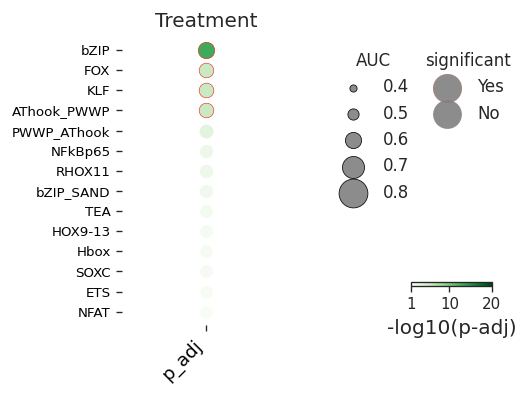

In [103]:
rcParams['figure.figsize'] = 8, 5
rcParams['figure.dpi'] = 120
# Fix export PDF as text issue
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42


CirclesHeatmap.make_bubble_heatmap(sig, auc, tickscolorbar=[1.0, 10, 20], vmin=1.0, vmax=20,
                                   heatmap_grid=heatmap_grid, circle_legend_grid=circle_legend_grid,
                                   colorbar_grid=colorbar_grid,
                                   palette_id='Greens', marker='o', quantAmplifier=27, power=4,
                                   grid=False, sig_line_width=0.1,
                                   rotation_xlabs=45, ha_xlabs='right', xlab='', ylab='',
                                   circle_legend_ticks=[0.4, 0.5, 0.6, 0.7, 0.8], yticks_fontsize=8,
                                   heatmap_title='Treatment', line_widths=line_widths, edgecolor='red',
                                   colorbar_ticks_labelsize=9, show_sig_legend=True, cbar_fmt_ticks='%1.0f',
                                   circles_legend_title='AUC', cbar_label='-log10(p-adj)')
plt.subplots_adjust(left=0.22, right=0.5, bottom=0.4)
plt.savefig('../../data/figures/aurocs_heatmap_cisbp_n_kmers_dotplot_2023.pdf')
plt.show()
plt.close()

In [66]:
import logomaker

20

In [75]:
np.log(np / np.log2()

,1,2,3,4,5,6,7,8,9,10,11,12
A,0.297619,0.485119,0.241071,0.095238,0.0,1.0,1.0,1.0,0.059524,0.145833,0.294643,0.261905
C,0.214286,0.139881,0.252976,0.666667,0.0,0.0,0.0,0.0,0.630952,0.276786,0.175595,0.238095
G,0.250000,0.139881,0.181548,0.035714,1.0,0.0,0.0,0.0,0.273810,0.145833,0.318452,0.250000
T,0.238095,0.235119,0.324405,0.202381,0.0,0.0,0.0,0.0,0.035714,0.431548,0.211310,0.250000


/home/rio/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


,1,2,3,4,5,6,7,8,9,10,11,12
A,0.251539,0.956411,0.000000,0.000000,0.0,2.0,2.0,2.0,0.000000,0.000000,0.237039,0.067114
C,0.000000,0.000000,0.017074,1.415037,0.0,0.0,0.0,0.0,1.335603,0.146841,0.000000,0.000000
G,0.000000,0.000000,0.000000,0.000000,2.0,0.0,0.0,0.0,0.131245,0.000000,0.349150,0.000000
T,0.000000,0.000000,0.375867,0.000000,0.0,0.0,0.0,0.0,0.000000,0.787592,0.000000,0.000000


bZIP
FOX
KLF


/home/rio/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
/home/rio/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
/home/rio/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


AThook_PWWP
PWWP_AThook
NFkBp65
RHOX11
bZIP_SAND


/home/rio/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
/home/rio/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
/home/rio/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
/home/rio/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
/home/rio/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


TEA
HOX9-13
Hbox
SOXC


/home/rio/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
/home/rio/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
/home/rio/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
/home/rio/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


ETS
NFAT


/home/rio/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
/home/rio/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


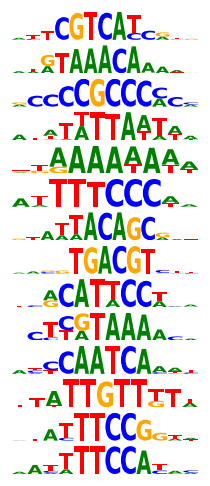

In [101]:
rcParams['figure.figsize'] = 2, 5
rcParams['figure.dpi'] = 120

for i, r in enumerate(auc.index):
    print(r)
    m = pwm_by_module[r].T
    # print(m)

    ax = plt.subplot2grid((auc.shape[0], 1), (i, 0), frame_on=False)

    log2 = np.log2(m / .25)
    log2[log2 < 0] = 0
    weights = pd.DataFrame(log2)
    weights.index = "A", "C", "G", "T"
    # print(weights.shape)
    crp_logo = logomaker.Logo(weights.T, shade_below=0.5, fade_below=0.5, ax=ax)
    # print(type(weights.T.shape[1]))
    xticks = [i for i in list(range(0, weights.T.shape[0], 5))]
    # print(xticks)
    plt.xticks([])
    plt.yticks([])

plt.savefig('../../data/figures/aurocs_heatmap_cisbp_n_kmers_dotplot_2023_motifs.pdf')